In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pprint

from math import sqrt, fabs
from scipy.optimize import minimize
from IPython.display import Image
from matplotlib.pyplot import imshow

sys.path.append('../')
from map import Map
from ph import *

plt.rcParams['figure.figsize'] = [24, 16] # default is [6.0, 4.0], good value is [24, 16]
plt.rcParams['figure.dpi'] = 50 # default is 72, good value is 50


A picture supposely taken from the Brevent.
[('Aiguille du Midi', (553, 410), 35.5),
 ('Mont Blanc du Tacul', (560, 221), 45.0),
 ('Mont Maudit', (488, 145), 56.3),
 ('Mont Blanc', (424, 22), 65.8),
 ('Dome du Gouter', (298, 104), 80.4),
 ('Aiguille du Gouter', (226, 174), 92.3),
 ('Aiguille de Bionnassay', (153, 50), 97.2)]


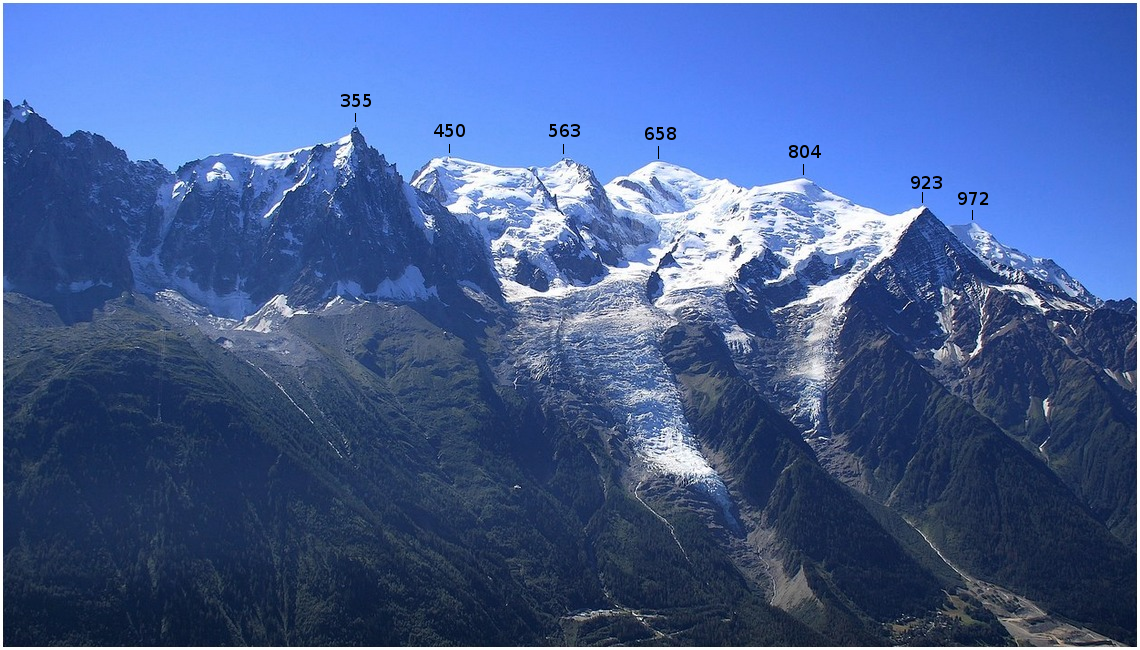

In [2]:
import data.brevent as data
print(format(data.description))
pprint.pprint(data.points)
Image(filename=data.picture)
#Image(filename=os.path.join("../data/brevent/", data.picturefile))

Barrycenter: (259.2255988685583, 686.8532749933704)


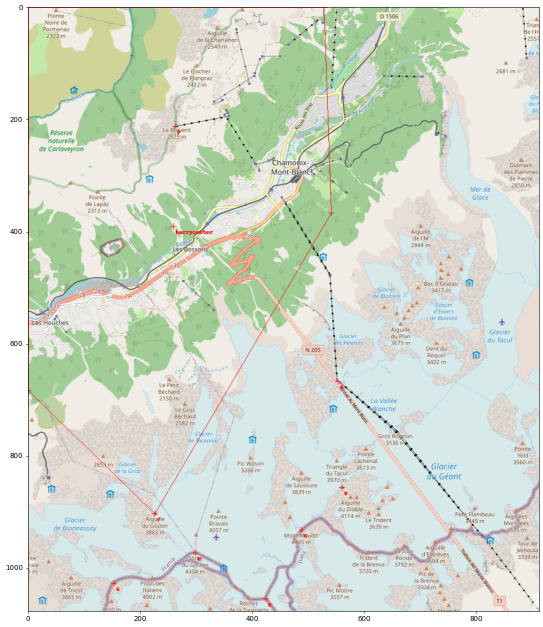

In [3]:
# Create a map and start drawing summits, photographer and area
map = Map(file=data.map)
for (summit, name) in zip(data.summits, "ABCDEFGHIKLMNOPQRSTUVWXYZ"):
    map.draw_point(summit, name, color="red")

map.draw_point(data.photographer, "P", color="red")

area = photographer_area(data.summits, data.dimensions)
map.draw_area(area, color="red")

barrycenter = barycenter(area)
map.draw_point(barrycenter, "barrycenter", color="red")
print("Barrycenter:", barrycenter)

map.show()

Optimizer:
  photographer: [385.0309094  801.42977684]
  error: 0.879285790006817

Reality  :
  photographer: (262, 865)
  error: 25.595493362667284



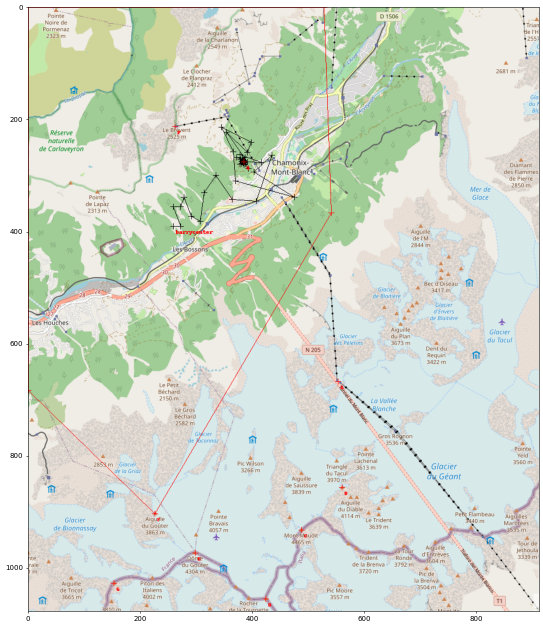

In [5]:
# Run the optimizer to locate the photographer

photograper, error, path = optimize_photograper(
    dimensions=map.dimensions,
    summits=data.summits,
    projections=data.projections
)

print("Optimizer:\n  photographer: {}\n  error: {}\n".format(photograper, error))
#pprint.pprint(path)

res = optimize_lens(data.photographer, summits=data.summits, projections=data.projections)
print("Reality  :\n  photographer: {}\n  error: {}\n".format(data.photographer, res.error))

# Display optimized position of the photographer
map.draw_path(path)
map.draw_point(photograper, name="Q", color="red")

map.show()